In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Import the dataframe and display the first 10 rows.#
df = pd.read_excel('Documents/Capstone Project/AirQualityUCI.xlsx', index_col=None)
df.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [5]:
#Can you count something interesting?#
#Out of 9357 total observations, how many have a NMHC value greater than 150?#
nmhc = df['NMHC(GT)'] > 150
len(df[nmhc])

454

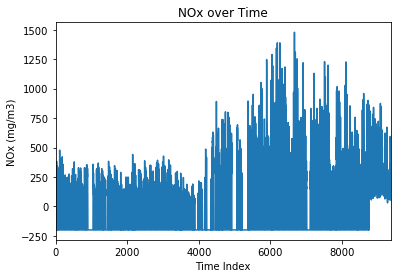

In [23]:
#Can you find some trends?#
#What is the general trend in NOx values over the course of the year?#
nox = df['NOx(GT)']
nox = nox.plot(title = 'NOx over Time')
nox.set_xlabel('Time Index')
nox.set_ylabel('NOx (mg/m3)')
plt.show()

In [ ]:
#The main observation from the time series of NOx values above is that NOx (and likely all the other air pollutants) /
# increase in the cold, winter months. This is due to dirty fuels (diesel, coal, kerosene) used for heating in Italy.#

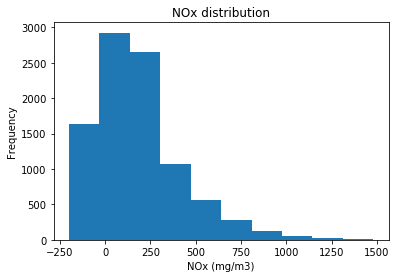

In [52]:
#Can you make a bar plot or a histogram?#
nox = df['NOx(GT)']
plt.hist(nox)
plt.title('NOx distribution')
plt.xlabel('NOx (mg/m3)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#The key takeaway from the histogram of NOx values is that most days have very low concentrations of air pollutants.
#The focus for this project - and for real-world management of air quality - is on the days with worst pollution levels.

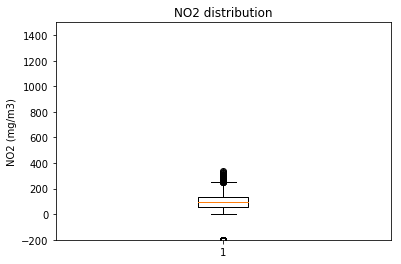

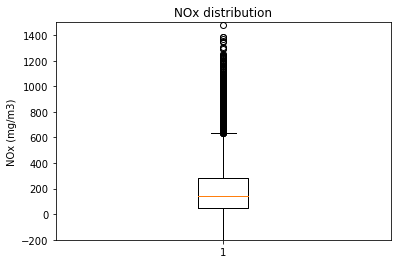

In [49]:
#Can you compare two related quantities?#
#How do the median NOx and NO2 values compare?#
no2 = df['NO2(GT)']
plt.boxplot(no2)
plt.title('NO2 distribution')
plt.ylabel('NO2 (mg/m3)')
plt.ylim([-200,1500])
plt.show()

nox = df['NOx(GT)']
plt.boxplot(nox)
plt.title('NOx distribution')
plt.ylabel('NOx (mg/m3)')
plt.ylim([-200,1500])
plt.show()

In [ ]:
#Seeing boxplots of NOx and NO2 side-by-side, it's clear that NOx value are skewed much higher than NOx.
#This isn't surprising, because NO2 is simply a subset of the broader NOx category. 
#In general, NOx will likely be a more useful air quality parameter for this project.

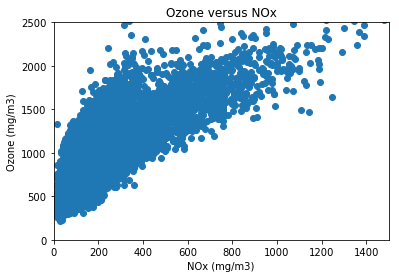

In [53]:
#Can you make a scatterplot?#
#How are NOx and O3 related to each other?#
nox = df['NOx(GT)']
ozone = df['PT08.S5(O3)']
plt.scatter(nox, ozone)
plt.title('Ozone versus NOx')
plt.ylabel('Ozone (mg/m3)')
plt.xlabel('NOx (mg/m3)')
plt.xlim([0,1500])
plt.ylim([0,2500])
plt.show()

In [ ]:
#The scatterplot of ozone and NOx values confirms that ozone is a secondary pollutant that forms in the atmosphere ;
#as a result of NOx and other photochemical pollutants interacting with sunlight. 
#Thus, the concentration of ozone is always as great or greater than the concentration of NOx.
#Put another way, there are no days with high NOx and low ozone.

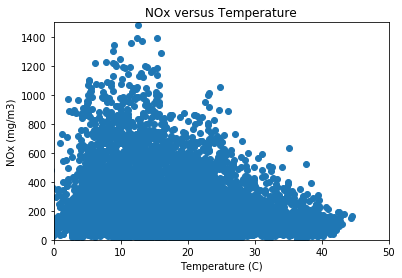

In [55]:
#How are NOx and Temperature related to each other?#
nox = df['NOx(GT)']
temp = df['T']
plt.scatter(temp, nox)
plt.title('NOx versus Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('NOx (mg/m3)')
plt.xlim([0,50])
plt.ylim([0,1500])
plt.show()

In [ ]:
#The relationship is a little harder to see here because there is a lot of noise in the data.
#However, the maximum NOx concentration for any given temperature is inversely proportional to temperature.
#Put another way, the highest possible NOx value on a cold day is much higher than on a hot day.
#Or put simply, the worst air quality days are all on cold days.

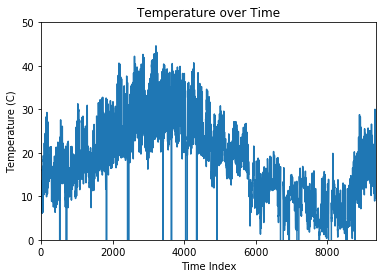

In [45]:
#Can you make a time series plot?#
#Temperature over time#
temp.plot()
plt.title('Temperature over Time')
plt.xlabel('Time Index')
plt.ylabel('Temperature (C)')
plt.ylim([0,50])
plt.show()

In [ ]:
#A simple time series plot showing the seasonal variation in temperature in Milan, Italy over a 1 year period.